# Intercompare Cell Density Maps

## Libs Sections 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_context('talk')
import cartopy.crs as ccrs
import cartopy.feature as cf


import glob

import tobac
import sys
import json




## Input Data 

In [44]:
main_dir = "/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/*/statistics"

flist = sorted( glob.glob(f'{main_dir}/pcount_precip_features_thresh*_202006.nc') )


In [45]:
dlist = []
for f in flist:
    experiment =  f.split('/')[-3]
    fname = f.split('/')[-1]

    d = xr.open_dataset( f )

    d = d.expand_dims('experiment')
    d['experiment'] = [experiment,]
    
    d = d.expand_dims('fname')
    d['fname'] = [fname]

    dlist += [d,]
    

In [46]:
d = xr.merge(dlist)

In [47]:
diff = d.diff('experiment')
diff['experiment'] = ['difference']

d = xr.concat([d, diff], dim = 'experiment')

### Reorder

In [54]:
flist = xr.concat([d.fname[-1],d.fname[:-1]], dim = 'fname')
flist

<xarray.DataArray 'fname' (fname: 4)> Size: 672B
array(['pcount_precip_features_thresh50_202006.nc',
       'pcount_precip_features_thresh100_202006.nc',
       'pcount_precip_features_thresh200_202006.nc',
       'pcount_precip_features_thresh500_202006.nc'], dtype='<U42')
Coordinates:
  * fname    (fname) <U42 672B 'pcount_precip_features_thresh50_202006.nc' .....

In [55]:
d = d.sel(fname = flist)

## Plotting

In [58]:
def map_plot( d,     target_map = ccrs.PlateCarree(), **kwargs):
    
    ax = plt.gca()
    d.plot(x = 'longitude', y = 'latitude', 
                       transform=ccrs.PlateCarree(),  # the data's projection
            subplot_kws={"projection": target_map},
           cbar_kwargs={'orientation': 'horizontal', 'shrink': 0.5},
           robust=True,
           **kwargs)

#    plt.colorbar( shrink = 0.7, label = f'Density of Precip Cells' )
#    xfeat.plot.scatter( x = 'longitude', y = 'latitude', markersize =size, 
#                       transform=ccrs.PlateCarree(),  # the data's projection
#            subplot_kws={"projection": target_map},)
    
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
#    ax.set_title(f'Distribution of precip. cells (> 50 mm day-1) for {date}', fontweight = 'bold') 

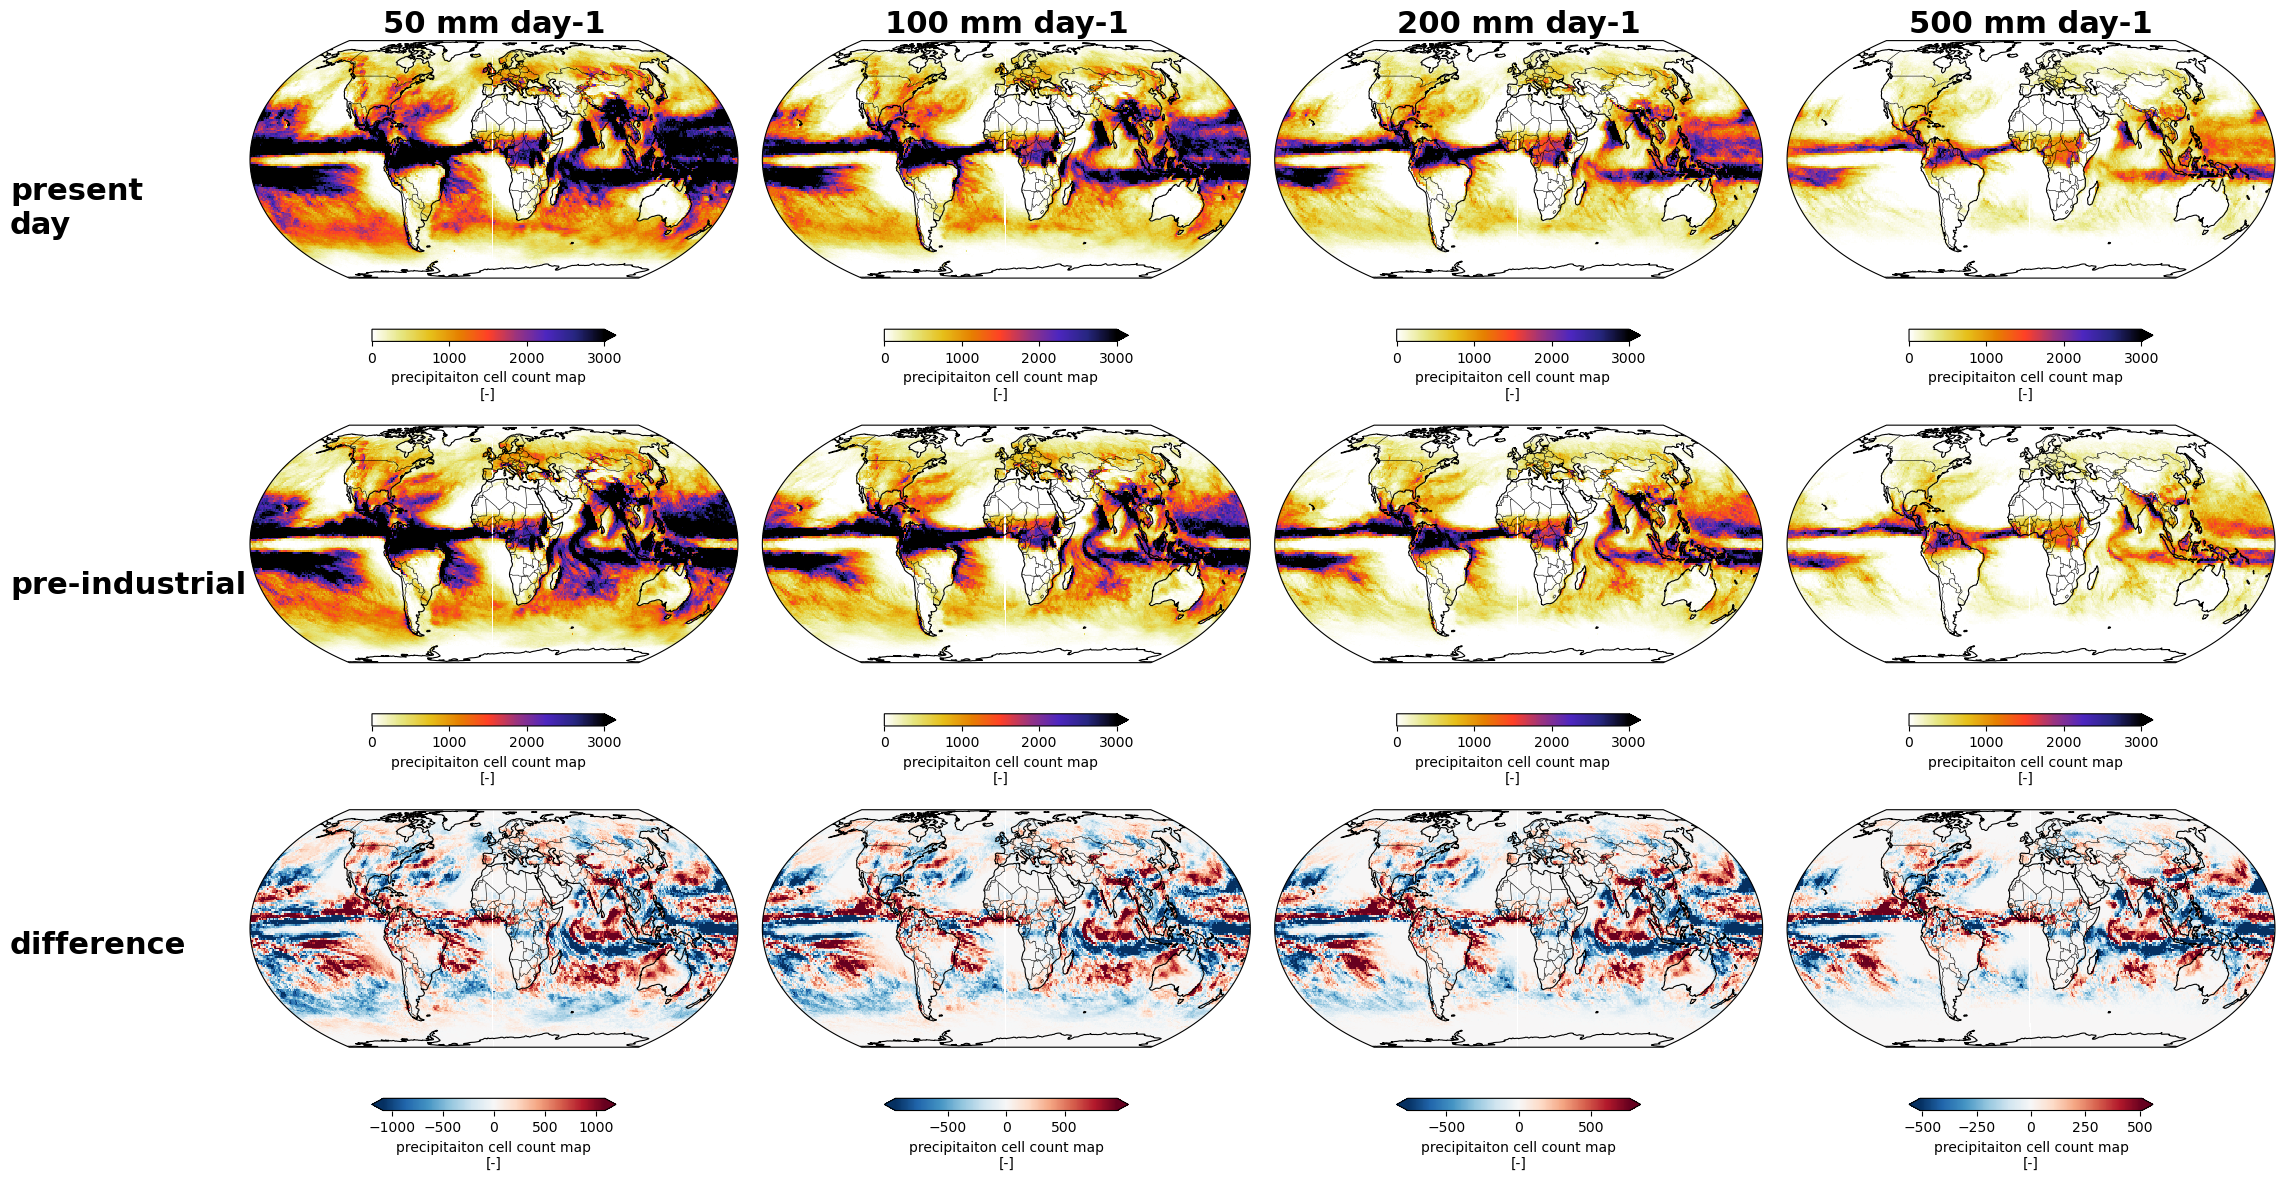

In [88]:
target_map = ccrs.EqualEarth()
fig, axs = plt.subplots(ncols=4, nrows = 3, subplot_kw={'projection': target_map}, figsize = (24,12))

left_text = ['present\nday', 'pre-industrial', 'difference']

for i in range(4):
    for j in range(3):
        plt.sca(axs[j,i])
        
        v = d.isel(experiment = j, fname = i)['pcount']
        
        fname = flist[i]
        thresh = str(fname.data).split('_')[3].replace('thresh','')

        if v.experiment == 'difference':
            cmap = plt.cm.RdBu_r
            vmax = None
        else:
            cmap = plt.cm.CMRmap_r
            vmax = 3000
        map_plot( v, cmap = cmap, vmax = vmax, target_map = target_map )

        if j == 0:
            plt.title(f'{thresh} mm day-1', fontweight = 'bold', fontsize = 22)
        else:
            plt.title('')

        if i == 0:
            plt.figtext(0.05, 0.8 - 0.3*j, left_text[j], fontweight = 'bold', fontsize = 22)
plt.tight_layout()
plt.subplots_adjust(left = 0.15, wspace=0.05)


Text(0.5, 1.0, 'Distribution of precip. cells (> 50 mm day-1) for 2020-06')

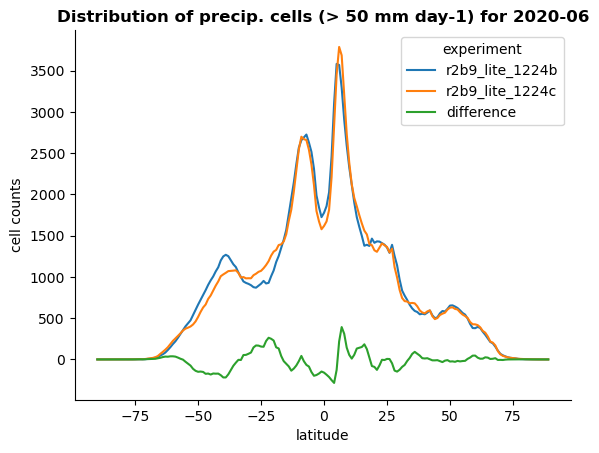

In [72]:
fname = flist[0]
thresh = str(fname.data).split('_')[3].replace('thresh','')

v = d['pcount'].mean('longitude').sel(fname = fname)
v.plot(hue = 'experiment')
sns.despine()
plt.ylabel('cell counts')
plt.title(f'Distribution of precip. cells (> {thresh} mm day-1) for 2020-06', fontweight = 'bold') 

Text(0.5, 1.0, 'Distribution of precip. cells (> 100 mm day-1) for 2020-06')

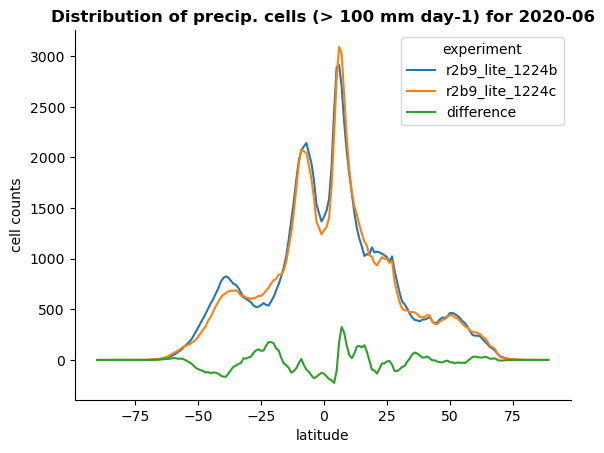

In [73]:
fname = flist[1]
thresh = str(fname.data).split('_')[3].replace('thresh','')

v = d['pcount'].mean('longitude').sel(fname = fname)
v.plot(hue = 'experiment')
sns.despine()
plt.ylabel('cell counts')
plt.title(f'Distribution of precip. cells (> {thresh} mm day-1) for 2020-06', fontweight = 'bold') 

Text(0.5, 1.0, 'Distribution of precip. cells (> 200 mm day-1) for 2020-06')

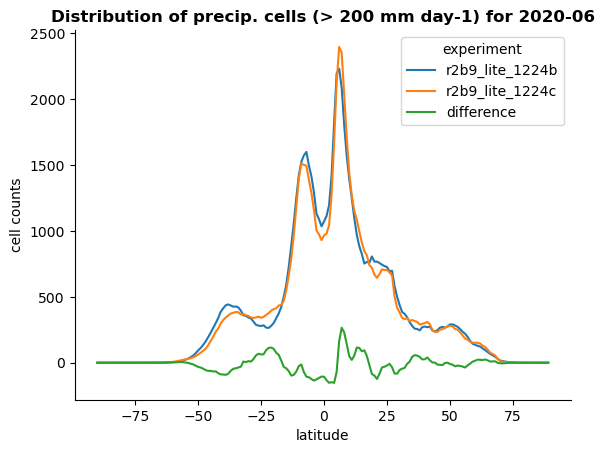

In [74]:
fname = flist[2]
thresh = str(fname.data).split('_')[3].replace('thresh','')

v = d['pcount'].mean('longitude').sel(fname = fname)
v.plot(hue = 'experiment')
sns.despine()
plt.ylabel('cell counts')
plt.title(f'Distribution of precip. cells (> {thresh} mm day-1) for 2020-06', fontweight = 'bold') 

Text(0.5, 1.0, 'Distribution of precip. cells (> 500 mm day-1) for 2020-06')

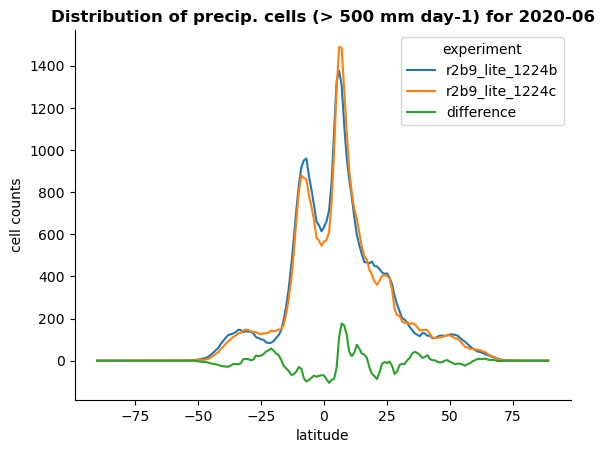

In [75]:
fname = flist[3]
thresh = str(fname.data).split('_')[3].replace('thresh','')

v = d['pcount'].mean('longitude').sel(fname = fname)
v.plot(hue = 'experiment')
sns.despine()
plt.ylabel('cell counts')
plt.title(f'Distribution of precip. cells (> {thresh} mm day-1) for 2020-06', fontweight = 'bold') 